In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#Passenger Id is just for indexing, name is not necessary as sex is already mentioned(extracting mr/mrs), cabin & ticket needs feature engineering to extract class of ticket but its already mentioned and contributes a little to the prediction so not worth it.
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'])

In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
df['Age']=df['Age'].fillna(df['Age'].median())
df=df.dropna(subset=['Embarked'])

# **Visualization**

Survival Rate
female : 74.04%
male : 18.89%


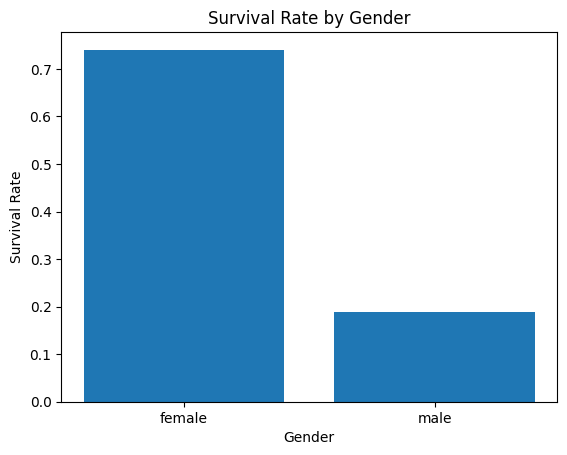

In [23]:
#gender-wise survival rate
grp = df.groupby("Sex")["Survived"].mean()
x = grp.index
y = grp.values
print("Survival Rate")
for gender,rate in grp.items():
    print(f"{gender} : {round(rate*100,2)}%")
plt.bar(x, y)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()
df["Sex"]=df["Sex"].map({"male":0,"female":1})

Survival Rate
1 : 62.62%
2 : 47.28%
3 : 24.24%


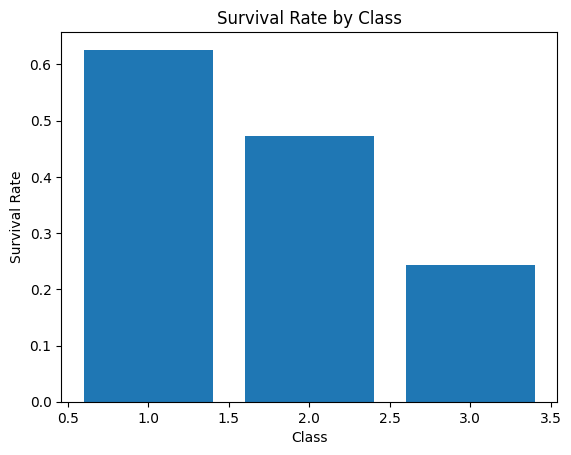

In [24]:
#class-wise survuval rate
grp=df.groupby("Pclass")["Survived"].mean()
x=grp.index
y=grp.values
print("Survival Rate")
for pclass,rate in grp.items():
    print(f"{pclass} : {round(rate*100,2)}%")
plt.bar(x, y)
plt.title("Survival Rate by Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

Child: 57.97%
Teen: 41.05%
Young Adult: 35.29%
Adult: 39.69%
Senior: 19.05%


C:\Users\abhay\AppData\Local\Temp\ipykernel_18916\3725351858.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp=df.groupby("AgeClass")["Survived"].mean()


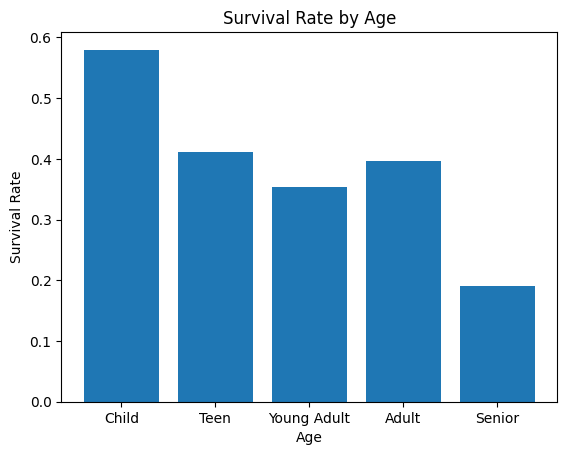

In [25]:
#age-wise survival rate
df["AgeClass"]=pd.cut(
    df["Age"],
    bins=[0,12,19,35,60,81],
    labels=["Child","Teen","Young Adult","Adult","Senior"]
)
grp=df.groupby("AgeClass")["Survived"].mean()
for age_class,rate in grp.items():
    print(f"{age_class}: {round(rate*100,2)}%")
x=grp.index
y=grp.values
plt.bar(x, y)
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()
df=df.drop(columns=['AgeClass'])

Survival Rate
C: 55.36%
Q: 38.96%
S: 33.7%


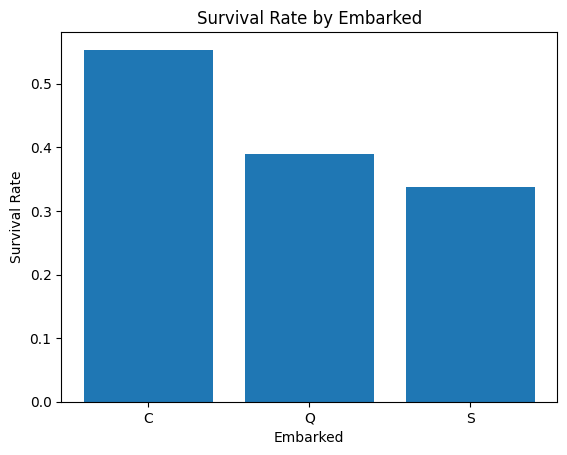

In [26]:
#Embarked-wise survival rate
grp=df.groupby("Embarked")["Survived"].mean()
x=grp.index
y=grp.values
print("Survival Rate")
for embarked,rate in grp.items():
    print(f"{embarked}: {round(rate*100,2)}%")
plt.bar(x,y)
plt.title("Survival Rate by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()
df["Embarked"]=df["Embarked"].map({"C":1,"Q":2,"S":3})

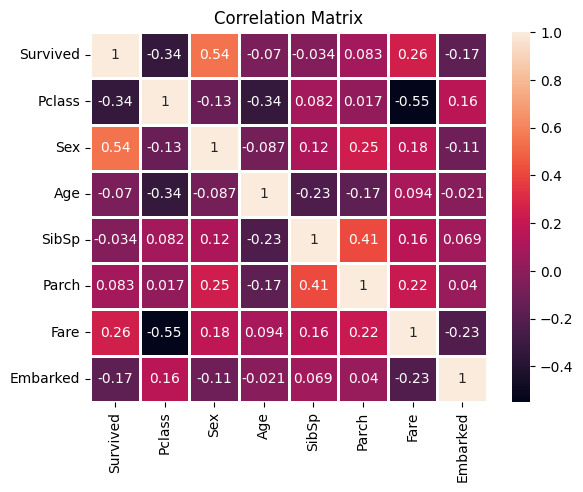

In [27]:
mat=df.corr(numeric_only=True)
sns.heatmap(mat,annot=True,linewidths=1)
plt.title("Correlation Matrix")
plt.show()

In [28]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
5,0,3,0,28.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,3
7,0,3,0,2.0,3,1,21.0750,3
8,1,3,1,27.0,0,2,11.1333,3
9,1,2,1,14.0,1,0,30.0708,1


In [29]:
x=df.drop(columns=['Survived'])
y=df['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,# test set size 20%
                                           random_state=1,#for repeated results
                                           stratify=y#balances survival rates in train and test
                                           )

In [ ]:
model=RandomForestClassifier(random_state=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
file='titanic_survival_model_rf.joblib'
joblib.dump(model,file)

['titanic_survival_model_rf.pkl']

In [31]:
accuracy=accuracy_score(ytest,ypred)
print(f"Random Forest Accuracy: {round(accuracy*100,2)}%")
print("\n\t\t-:Classification Report:-")
print(classification_report(ytest,ypred))

Random Forest Accuracy: 81.46%

		-:Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.76      0.76        68

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178



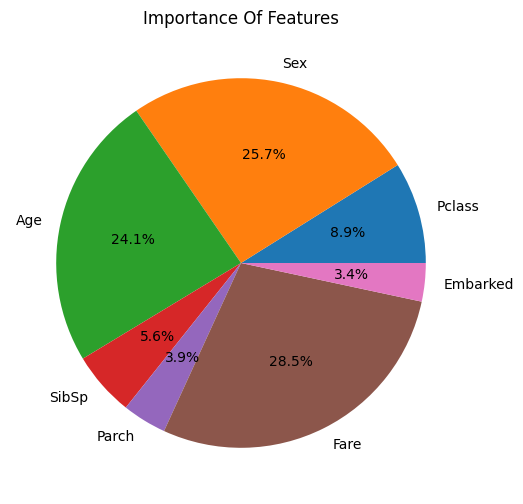

In [32]:
importances=pd.Series(model.feature_importances_,index=x.columns)
plt.figure(figsize=(6,6))
importances.plot(kind="pie",autopct="%1.1f%%")
plt.title("Importance Of Features")
plt.show()
